# **Lead Scoring Assignment**

Objective of the analysis is to use logistic regression and share recommendations to improve lead conversion ratio of the company

# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

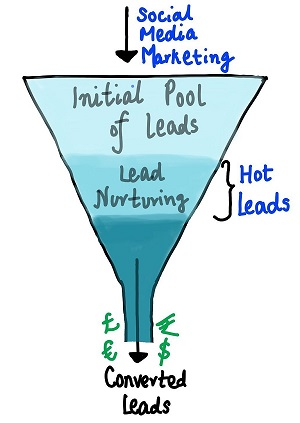

As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers.The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.



#### Data

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

#### Goal

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### **Step 1:** Importing libraries and loading data

In [1]:
#Import the required Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#Read the data in pandas
leads = pd.read_csv("Leads.csv")

In [3]:
#Verifying that the data of leads has been loaded properly
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


> **Observations**
> - The data has been loaded properly
> - There are a few columns which show 'Select' as the value. These are essentially records where nothing has been selected and can be interpreted as missing. These need to be replaced

### **Step 2:** Data Cleaning & Outlier Treatment

#### **Step 2.1:** First, we will check the data type for the leads dataframe

In [4]:
leads.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

> **Observations**
> - The data type of all columns are accurate based on the data expected in the columns when compared against the data dictionary and the sample data above
> - However, we can see that there are quite a few missing records and it needs to be handled.

#### **Step 2.2:** Dropping columns which are not required

*  The columns 'Prospect ID' and 'Lead Number' are unique and don't add information to the model, so these will be dropped

In [5]:
leads.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

#### **Step 2.3:** Checking the values in the columns and replacing if required

In [6]:
leads.replace('Select', np.nan, inplace = True)

#### **Step 2.4:** Identifying missing information within each column for the leads data and handling appropriately

*  Now that we have removed 'Select' with missing, we will check the total missing records and handle them
*  In order to identify missing data, we will use isnull() function

In [7]:
#First, let's use isnull() to check the missing data
leads.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [8]:
#We can see a lot of missing records in few columns. Let's identify the percentage of missing records
round(100 * (leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Do Not Call                                       0.00
Converted 

> **Observations**
> - As we can see, there are 13 columns with high percentage of missing records out of which 7 have more than 45% data missing
> - Let's drop these columns and then manage the other columns with missing information

In [9]:
#Dropping > 45% null columns
leads.drop(['How did you hear about X Education','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'], 1, inplace = True)


In [10]:
#Let's see the percentages of missing data again
round(100 * (leads.isnull().sum()/leads.shape[0]),2).sort_values(ascending=False)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Last Notable Activity                             0.00
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
Total Time Spent on Website                       0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Newspaper 

In [11]:
# We will see all the columns with missing rows separately

print('Checking for column \'Lead Source\'')
print('')
print(leads['Lead Source'].value_counts(dropna = False))
print('-'*50)

#Drop the rows with missing data
leads = leads[~(leads['Lead Source'].isnull()==True)]
print('')
print(leads['Lead Source'].value_counts(dropna = False))

Checking for column 'Lead Source'

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
blog                    1
NC_EDM                  1
testone                 1
Name: Lead Source, dtype: int64
--------------------------------------------------

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat              

In [12]:
print('Checking for column \'TotalVisits\'')
print('')
print(leads['TotalVisits'].value_counts(dropna = False))
print('-'*50)

#Drop the rows with missing data
leads = leads[~(leads['TotalVisits'].isnull()==True)]
print('')
print(leads['TotalVisits'].value_counts(dropna = False))

Checking for column 'TotalVisits'

 0.0      2161
 2.0      1679
 3.0      1306
 4.0      1120
 5.0       783
 6.0       466
 1.0       395
 7.0       309
 8.0       224
 9.0       164
NaN        130
 10.0      114
 11.0       86
 13.0       48
 12.0       45
 14.0       36
 16.0       21
 15.0       18
 17.0       16
 18.0       15
 20.0       12
 19.0        9
 21.0        6
 23.0        6
 27.0        5
 25.0        5
 24.0        5
 22.0        3
 26.0        2
 29.0        2
 28.0        2
 115.0       1
 54.0        1
 43.0        1
 30.0        1
 32.0        1
 74.0        1
 251.0       1
 41.0        1
 141.0       1
 42.0        1
 55.0        1
Name: TotalVisits, dtype: int64
--------------------------------------------------

0.0      2161
2.0      1679
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16

In [13]:
# Now, looking at columns with comparatively higher missing percentages
print(leads['Country'].value_counts(dropna = False))

# As the missing records in the column is high and most of the remaining data is 'India', the column is not adding much information so we will drop the column
leads.drop(['Country'],1,inplace = True)

India                   6491
NaN                     2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Kuwait                     4
Canada                     4
Germany                    4
South Africa               4
Nigeria                    4
Sweden                     3
Ghana                      2
China                      2
Asia/Pacific Region        2
Netherlands                2
Uganda                     2
Philippines                2
Italy                      2
Belgium                    2
Bangladesh                 2
Vietnam                    1
Switzerland                1
Russia                     1
Liberia                    1
Malaysia                   1
Sri Lanka     

In [14]:
#Checking for missing specialization data
leads['Specialization'].value_counts(dropna = False)

NaN                                  3282
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

> **Observations**
> - There are 3282 records with specialization missing but some of it might be valid scenario
> - Therefore, for leads of unemployed folks or students, we will fill the column with not applicable and remove the rows where the data is expected

In [15]:
lead_spec = leads[leads.Specialization.isnull() == True]
print(lead_spec['What is your current occupation'].value_counts(dropna = False))

Unemployed              1738
NaN                     1426
Student                   85
Working Professional      30
Businessman                2
Other                      1
Name: What is your current occupation, dtype: int64


> - Based on the above segregation, we can see that most of the missing specialization is coming from unemployed folks. We will fill the value for these. 
> - However, we will remove the rows where both specialization and occupation is missing as it will not add much accurate information for the final model
> - Similarly, we will fill values for students but remove working professionals with missing specialization

In [16]:
#Updating specialization as mentioned above
leads = leads[~((leads['Specialization'].isnull()== True) & ((leads['What is your current occupation'].isnull()== True) | (leads['What is your current occupation'] == 'Working Professional') | (leads['What is your current occupation'] == 'Businessman') | (leads['What is your current occupation'] == 'Other')))]
leads['Specialization'] = leads['Specialization'].replace(np.nan,'Not Applicable')
print(leads['Specialization'].value_counts(dropna = False))


Not Applicable                       1823
Finance Management                    959
Human Resource Management             837
Marketing Management                  823
Operations Management                 499
Business Administration               399
IT Projects Management                366
Supply Chain Management               346
Banking, Investment And Insurance     335
Media and Advertising                 202
Travel and Tourism                    202
International Business                176
Healthcare Management                 156
Hospitality Management                111
E-COMMERCE                            111
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


In [17]:
# Now we will look at missing data in 'What is your current occupation'
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              5476
NaN                     1257
Working Professional     647
Student                  206
Other                     14
Housewife                  9
Businessman                6
Name: What is your current occupation, dtype: int64

> - We can see that the mode of the data is 'Unemployed' so we will use this value to fill in the missing records

In [18]:
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')
leads['What is your current occupation'].value_counts(dropna = False)

Unemployed              6733
Working Professional     647
Student                  206
Other                     14
Housewife                  9
Businessman                6
Name: What is your current occupation, dtype: int64

In [19]:
# Now, we will look at missing data in the column 'What matters most to you in choosing a course'
leads['What matters most to you in choosing a course'].value_counts(dropna = False)

Better Career Prospects      6342
NaN                          1271
Other                           1
Flexibility & Convenience       1
Name: What matters most to you in choosing a course, dtype: int64

> - Based on the above data, it seems that most of the leads are for better career prospects
> - As there are not enough records for other types, we can just drop the column

In [20]:
leads.drop(['What matters most to you in choosing a course'],1,inplace = True)

In [21]:
# Now, we will look at the column 'Tags'
leads['Tags'].value_counts(dropna = False)

Will revert after reading the email                  2001
NaN                                                  1929
Ringing                                              1184
Interested in other courses                           482
Already a student                                     461
Closed by Horizzon                                    299
switched off                                          239
Busy                                                  185
Lost to EINS                                          164
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

> - Based on the data, we can not say what the status of the lead is but they should still be tracked so we will just fill the missing with 'Not Specified'

In [22]:
leads['Tags'] = leads['Tags'].replace(np.nan, 'Not Specified')
leads.Tags.value_counts(dropna = False)

Will revert after reading the email                  2001
Not Specified                                        1929
Ringing                                              1184
Interested in other courses                           482
Already a student                                     461
Closed by Horizzon                                    299
switched off                                          239
Busy                                                  185
Lost to EINS                                          164
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

In [23]:
# Now, we will check for the column 'City'
leads.City.value_counts(dropna = False)

Mumbai                         3161
NaN                            2146
Thane & Outskirts               740
Other Cities                    674
Other Cities of Maharashtra     444
Other Metro Cities              376
Tier II Cities                   74
Name: City, dtype: int64

> - We will not drop the leads based on missing city information and can thus fill the value with the most frequent value i.e. Mumbai

In [24]:
leads.City = leads.City.replace(np.nan, 'Mumbai')
leads.City.value_counts(dropna = False)

Mumbai                         5307
Thane & Outskirts               740
Other Cities                    674
Other Cities of Maharashtra     444
Other Metro Cities              376
Tier II Cities                   74
Name: City, dtype: int64

In [25]:
#Finally, let's check the missing data again
round(100 * (leads.isnull().sum()/leads.shape[0]),2)

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

> - We can see that all missing data has been managed so we will move on to outliers in the numerical columns

#### **Step 2.5:** Outliers handling in numerical columns

*  We have handled the missing information and now we will move to see if there are outliers in the numerical columns which might skew our final model

In [26]:
# Decide the columns for which we need to do outlier analysis. We will do this by using the describe function on the data
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7615.000000,7615.000000,7615.000000,7615.000000
mean,0.428759,3.801576,533.709521,2.622411
std,0.494931,5.060225,554.642188,2.151066
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,61.000000,1.330000
50%,0.000000,3.000000,295.000000,2.000000
75%,1.000000,5.000000,1010.000000,4.000000
max,1.000000,251.000000,2272.000000,55.000000


> - Based on the data above, we will not have to manage data in 'Converted' as it is the target binary column
> - But for the other columns, we can see that the maximum value is very high in comparison to the mean values
> - We will check for different quantiles and then remove the extremes so that they don't skew the model

In [27]:
#Checking quantiles for TotalVisits
leads['TotalVisits'].describe(percentiles=[0.01, 0.2, 0.5, 0.75, 0.90, 0.95, 0.99, 1])

count    7615.000000
mean        3.801576
std         5.060225
min         0.000000
1%          0.000000
20%         1.000000
50%         3.000000
75%         5.000000
90%         8.000000
95%        10.000000
99%        17.860000
100%      251.000000
max       251.000000
Name: TotalVisits, dtype: float64

> - We can see that the first and the last percentage of the data are extreme values with one being 0 and one shooting from 17 to 251
> - We can remove these two extremes

In [28]:
# Removing upper extreme
upper = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= upper)]

#Removing lower extreme
lower = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= lower)]

In [29]:
#Checking quantiles for 'Total Time Spent on Website'
leads['Total Time Spent on Website'].describe(percentiles=[0.05, 0.1, 0.15, 0.2, 0.5, 0.75, 0.90, 0.95, 0.99, 1])

count    7538.000000
mean      532.753516
std       554.556307
min         0.000000
5%          0.000000
10%         0.000000
15%         0.000000
20%        18.000000
50%       295.000000
75%      1009.000000
90%      1411.000000
95%      1584.000000
99%      1846.630000
100%     2272.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

> - There doesn't seem to be any extreme jump in the data when checked through quantiles
> - In order to confirm the same, we can plot a boxplot for the same

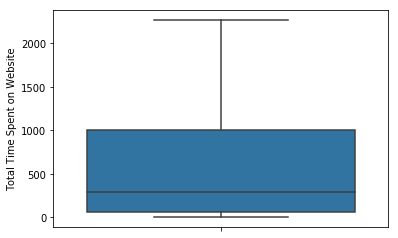

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

> - As we can see, there are no outliers in this column and we can move on to the next numerical column

In [31]:
#Checking quantiles for 'Page Views Per Visit'
leads['Page Views Per Visit'].describe(percentiles=[0.05, 0.1, 0.15, 0.2, 0.5, 0.75, 0.90, 0.95, 0.99, 1])

count    7538.000000
mean        2.597787
std         2.049287
min         0.000000
5%          0.000000
10%         0.000000
15%         0.000000
20%         1.000000
50%         2.000000
75%         4.000000
90%         5.000000
95%         6.000000
99%         9.000000
100%       16.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

> - There seems to be a slight jump towards the end
> - We can quickly check through a box plot and remove the upper extreme

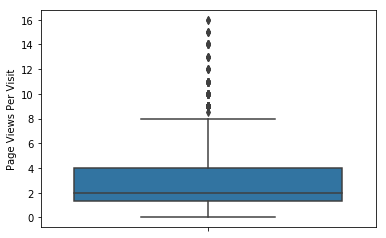

In [32]:
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

> - We can see that the jump is not extreme and there are continuous values post the 99th percentile too
> - Instead of removing rows, we can limit the upper extreme to a value so that the model is not skewed and we also don't lose information

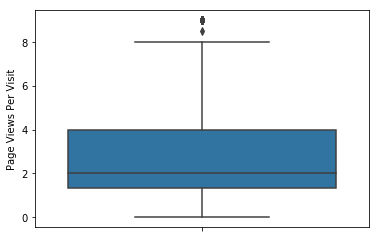

In [33]:
# Limiting the upper 1 percentile of data in 'Page Views Per Visit' to the value of 10
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].where(leads['Page Views Per Visit']<9, other = 9)

#Checking the plot again post limiting
plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [34]:
# Let's describe the data again post outlier handling
leads.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,7538.000000,7538.000000,7538.000000,7538.000000
mean,0.428628,3.539268,532.753516,2.574837
std,0.494913,2.977579,554.556307,1.953149
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,60.000000,1.330000
50%,0.000000,3.000000,295.000000,2.000000
75%,1.000000,5.000000,1009.000000,4.000000
max,1.000000,17.000000,2272.000000,9.000000


> - Now the data seems more continuous and we don't have many extremes
> - Next step will be to perform univariate and bivariate analyses

## **Step 3:** Exploratory Data Analysis

*  We have handled the missing data and the outliers already
*  Now, we will be moving to univariate analysis
*  We will use these to assess the different categories in each column and reduce the split if possible in order to have less and only required features once dummies are created

__Converted Customers Percentage__

Converted %:  42.86282833642876 %


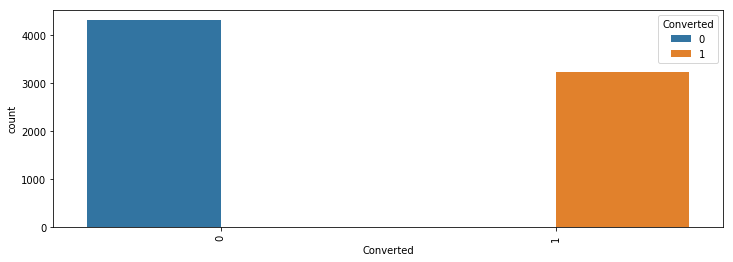

In [35]:
# Drop columns
print('Converted %: ',(len(leads[leads['Converted'] == 1])/len(leads)*100), '%')

# Plot converted & non convereted customer count
plt.figure(figsize=(12,4))
sns.countplot(x = 'Converted', hue = "Converted", data = leads)
plt.xticks(rotation=90)
plt.show()

Around 43% are converted customers

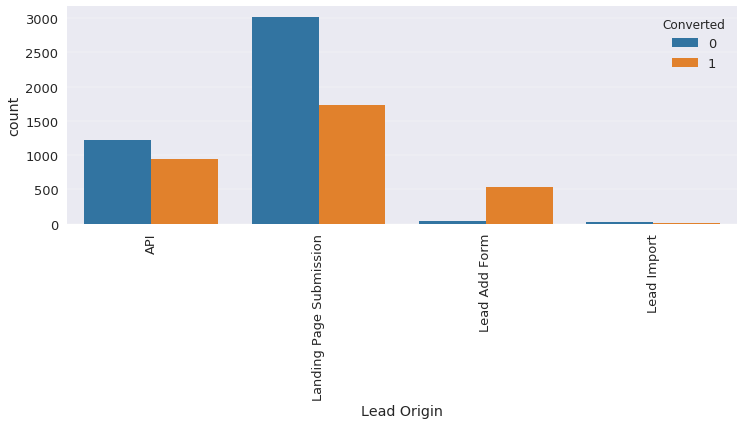

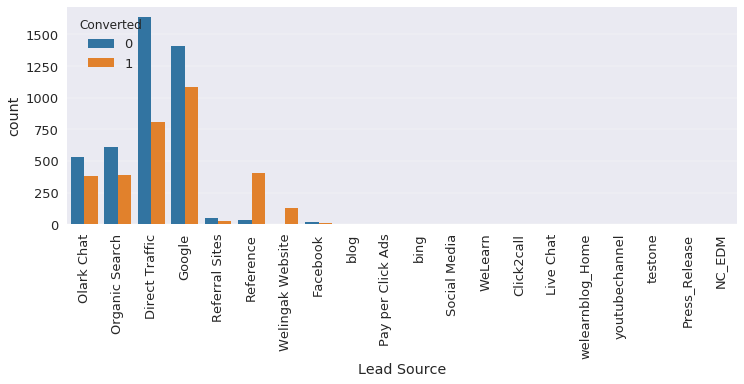

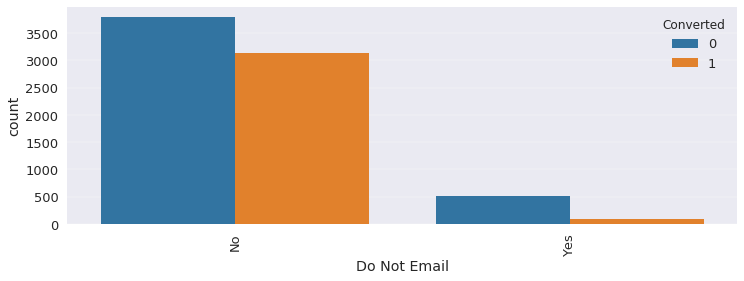

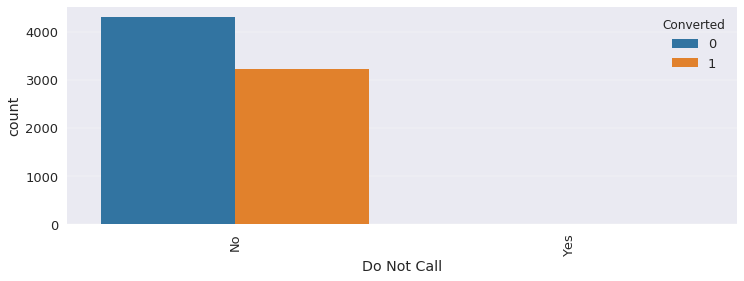

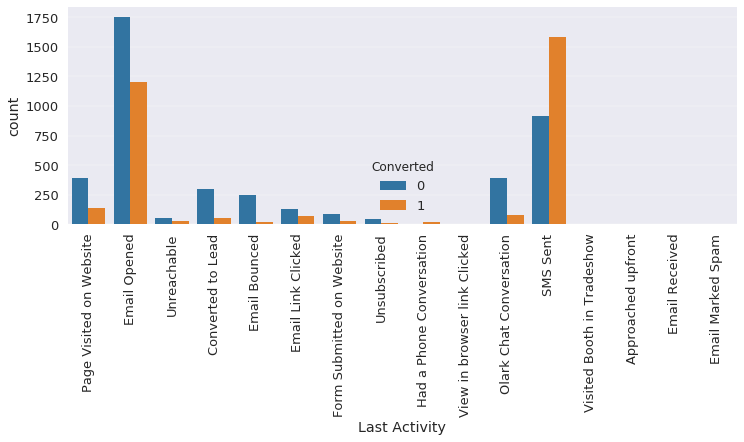

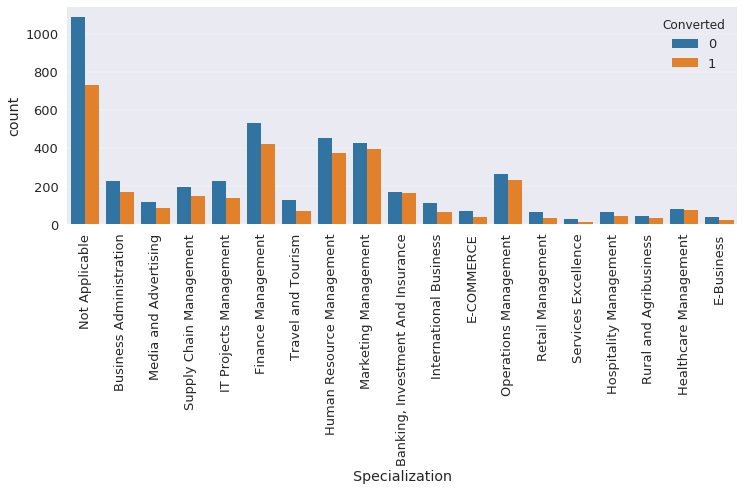

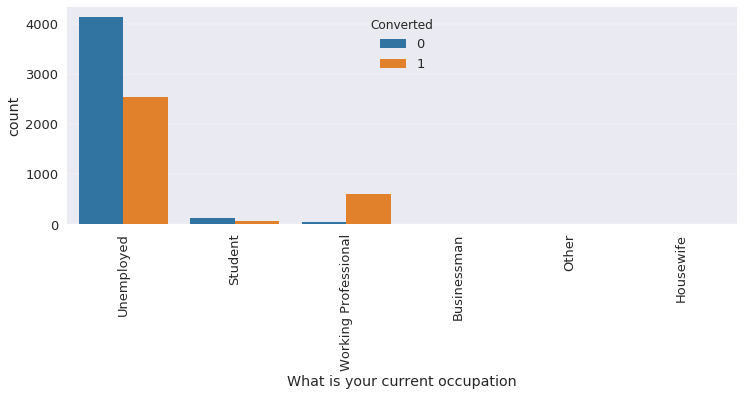

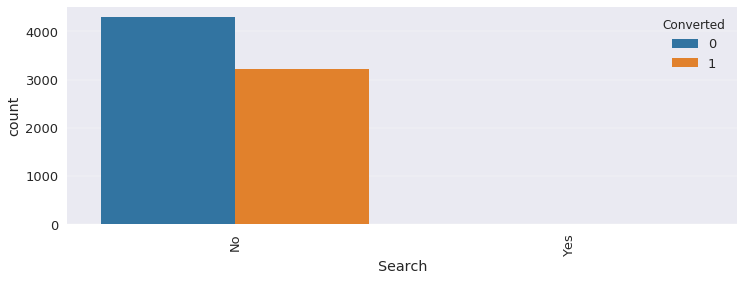

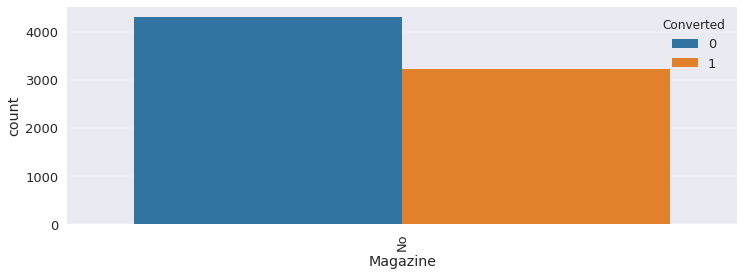

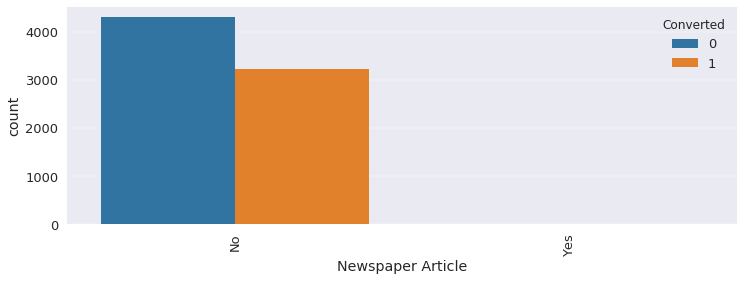

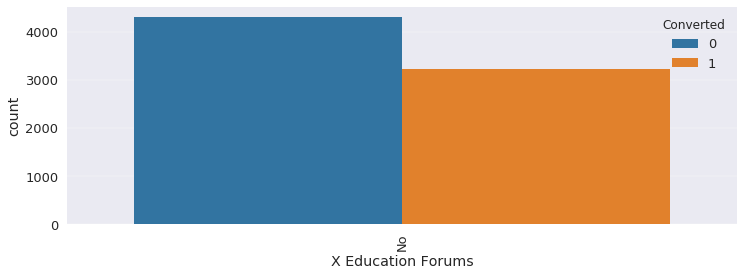

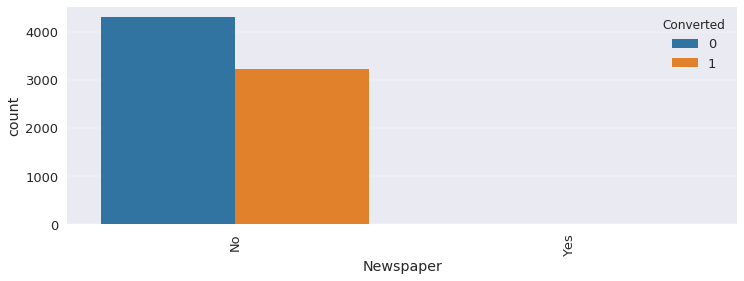

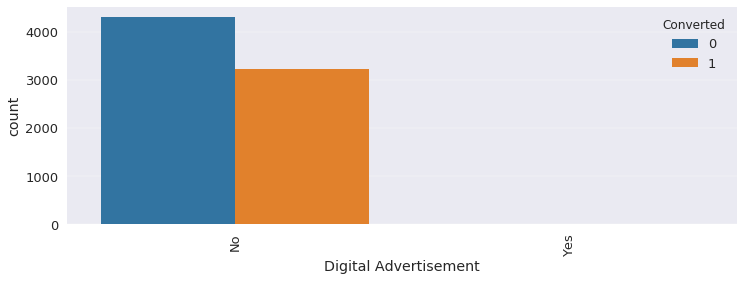

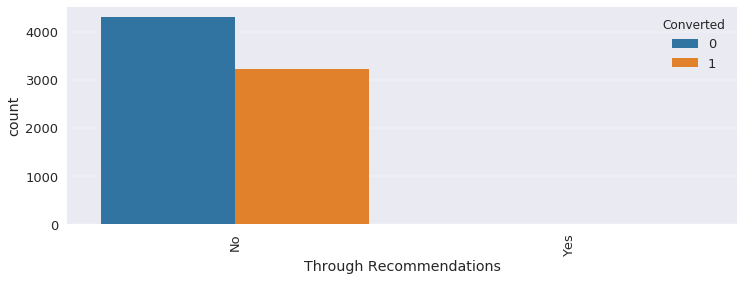

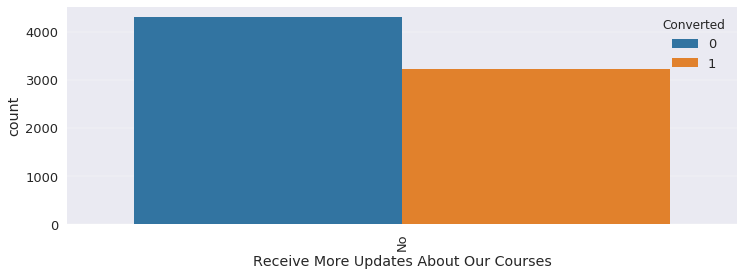

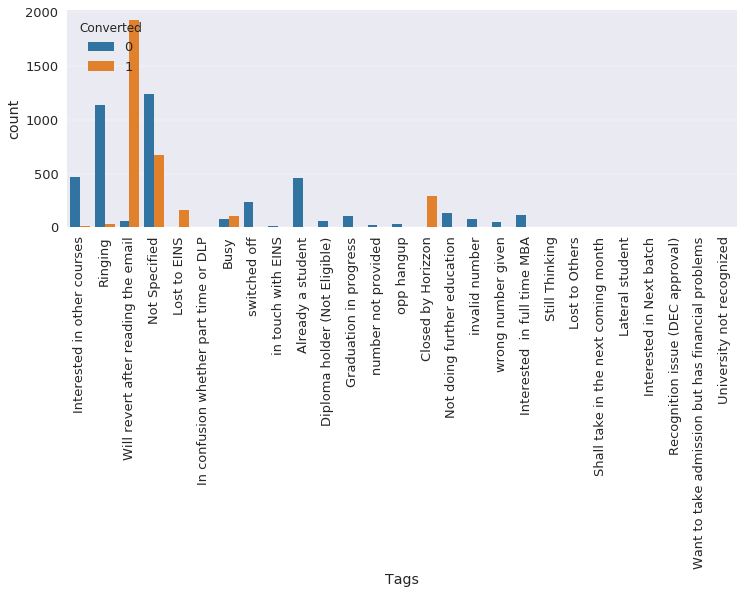

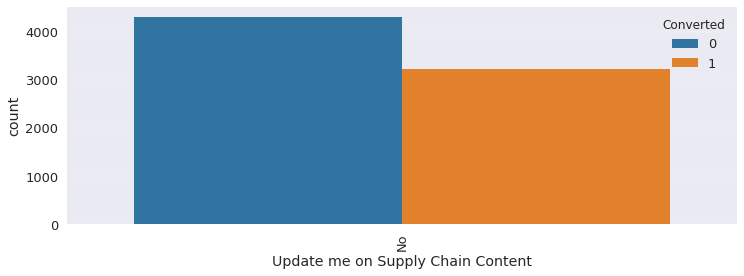

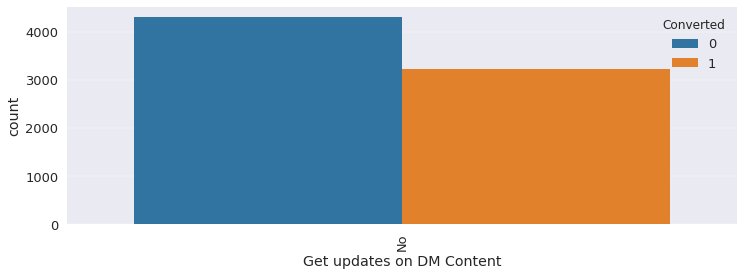

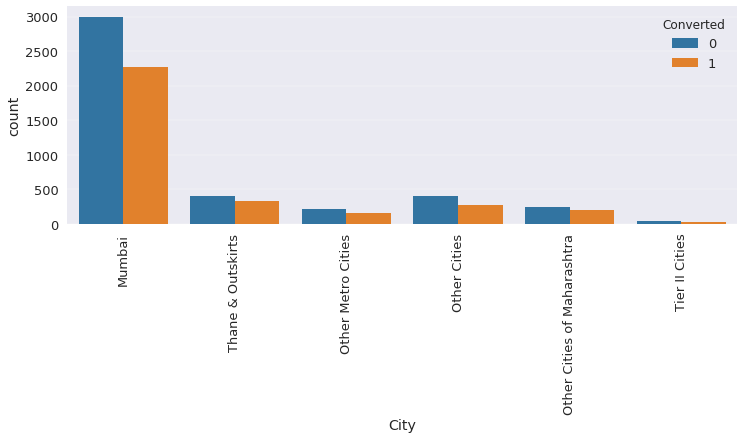

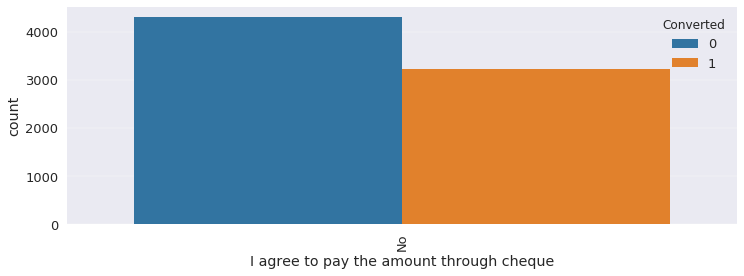

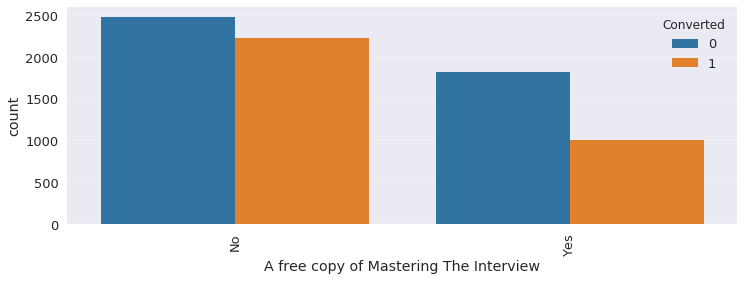

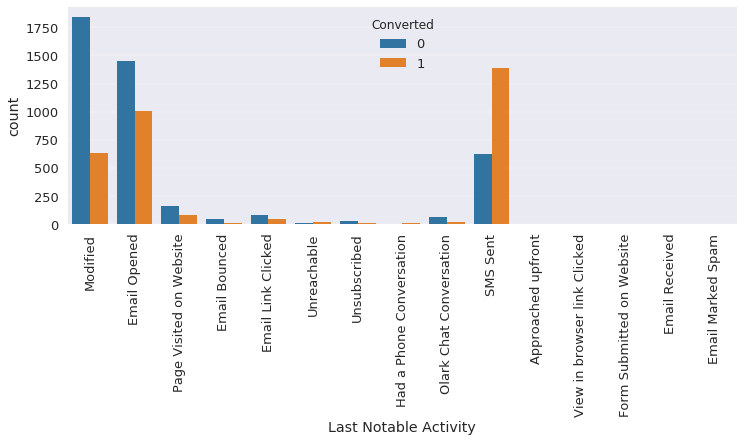

In [36]:
# Creating a list of categorical variables
leads_cat_variables = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Specialization', 'What is your current occupation', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Tags', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview', 'Last Notable Activity']

#Visualizing the categorical variables
sns.set_style('darkgrid')
sns.set_context('talk', rc={"grid.linewidth": 0.3})
for item in leads_cat_variables:    
    # Plot graphs for item
    plt.figure(figsize=(12,4))
    sns.countplot(x = item, hue = "Converted", data = leads)
    plt.xticks(rotation=90)


> **Observations regarding each column and next steps**
> - __Lead Origin:__ API & Landing Page Submission has the highest number of customers which have converted. Lead Add Form has the highest conversion % but it doesn't have more number of leads.
> - __Lead Source:__ Google & Direct Traffic has the highest converted leads. Also, the number of categories is high and quite a few of them have only single digit occurences so they can be combined into an 'Other' category to reduce unnecessary features
> - __Last Activity:__ Most of the leads have their last activity as Email Opened. Most of the converted leads have their last activity as SMS Sent. Here as well the number of categories is high and we can bucket some of them as Others when their frequency is low.
> - __What is your current occupation:__ Although unemployed customers have higher number of leads but conversion rate is around 40-50%. Working Professionals have highest conversion rates.
> - We need to find avenues for similar bucketing in 'Specialization', 'What is your current occupation', 'Tags', 'City' and 'Last Notable Activity'
> - 'Magazine', 'X Education Forums', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', and 'I agree to pay the amount through cheque' have just one value so can be dropped
> - 'Newspaper Article', 'Newspaper', 'Digital Advertisement', 'Through Recommendations' have mostly one value so they can be dropped as well

In [37]:
#Creating a list of columns to be dropped
cols_to_be_dropped = ['Magazine', 'X Education Forums', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'Newspaper Article', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']

#Dropping the columns
leads.drop(cols_to_be_dropped,1,inplace = True)


In [38]:
#Bucketing Lead Source

#Checking the segregation of the column
leads['Lead Source'].value_counts()

Google               2490
Direct Traffic       2441
Organic Search       1000
Olark Chat            911
Reference             439
Welingak Website      129
Referral Sites         80
Facebook               28
Click2call              4
bing                    3
Live Chat               2
Press_Release           2
Social Media            2
youtubechannel          1
welearnblog_Home        1
Pay per Click Ads       1
WeLearn                 1
blog                    1
NC_EDM                  1
testone                 1
Name: Lead Source, dtype: int64

> - Based on the data and histplot seen earlier, we can see the few values having only minor frequency
> - So we will categorize all of those with frequency under 50 in the bracket of 'Others'

In [39]:
#Replacing the values
leads['Lead Source'] = leads['Lead Source'].replace(['Facebook','Click2call','bing','Social Media','Live Chat','Press_Release','Pay per Click Ads','WeLearn','blog','welearnblog_Home','youtubechannel','testone','NC_EDM'],'Others')

#Checking the segregation of the column again
leads['Lead Source'].value_counts()


Google              2490
Direct Traffic      2441
Organic Search      1000
Olark Chat           911
Reference            439
Welingak Website     129
Referral Sites        80
Others                48
Name: Lead Source, dtype: int64

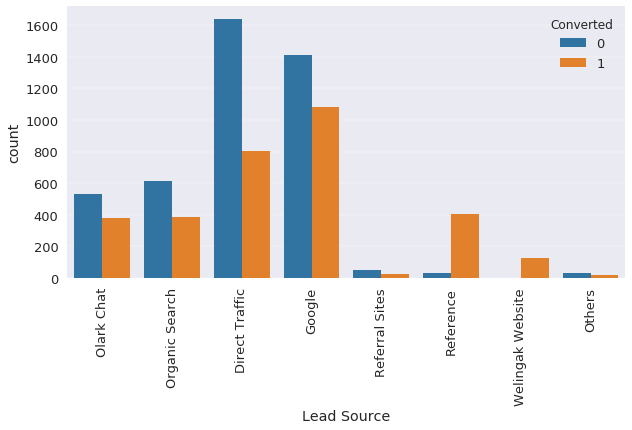

In [40]:
# Plot Leads Source modified
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

In [41]:
#Bucketing Last Activity

#Checking the segregation of the column
leads['Last Activity'].value_counts()

Email Opened                    2958
SMS Sent                        2494
Page Visited on Website          527
Olark Chat Conversation          461
Converted to Lead                350
Email Bounced                    261
Email Link Clicked               203
Form Submitted on Website        113
Unreachable                       84
Unsubscribed                      52
Had a Phone Conversation          22
Approached upfront                 5
View in browser link Clicked       3
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

> - Based on the data and the plot seen earlier, we can see the few values having only minor frequency
> - So we will categorize all of those with frequency under 100 in the bracket of 'Others'

In [42]:
#Replacing the values
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Received','Email Marked Spam','Visited Booth in Tradeshow'],'Others')

#Checking the segregation of the column again
leads['Last Activity'].value_counts()


Email Opened                 2958
SMS Sent                     2494
Page Visited on Website       527
Olark Chat Conversation       461
Converted to Lead             350
Email Bounced                 261
Email Link Clicked            203
Others                        171
Form Submitted on Website     113
Name: Last Activity, dtype: int64

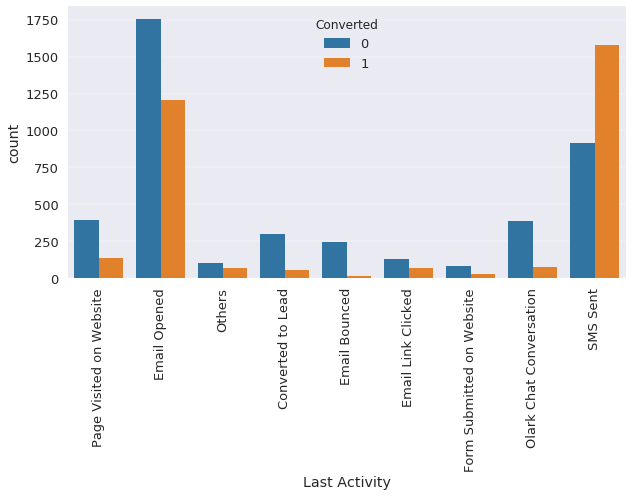

In [43]:
# Plot Last Activity modified
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

In [44]:
#Bucketing Specialization

#Checking the segregation of the column
leads['Specialization'].value_counts()

Not Applicable                       1818
Finance Management                    951
Human Resource Management             825
Marketing Management                  818
Operations Management                 497
Business Administration               393
IT Projects Management                363
Supply Chain Management               343
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
Healthcare Management                 151
E-COMMERCE                            110
Hospitality Management                109
Retail Management                      97
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

> - Based on the data and the plot seen earlier, we can see there are many different types of Management specializations
> - We can bucket all of them under 'Management Specializations'

In [45]:
#Replacing the values
leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management','Marketing Management','Operations Management','IT Projects Management','Supply Chain Management','Healthcare Management','Hospitality Management','Retail Management'],'Management Specializations')

#Checking the segregation of the column again
leads['Specialization'].value_counts()


Management Specializations           4154
Not Applicable                       1818
Business Administration               393
Banking, Investment And Insurance     327
Media and Advertising                 199
Travel and Tourism                    197
International Business                174
E-COMMERCE                            110
Rural and Agribusiness                 70
E-Business                             56
Services Excellence                    40
Name: Specialization, dtype: int64

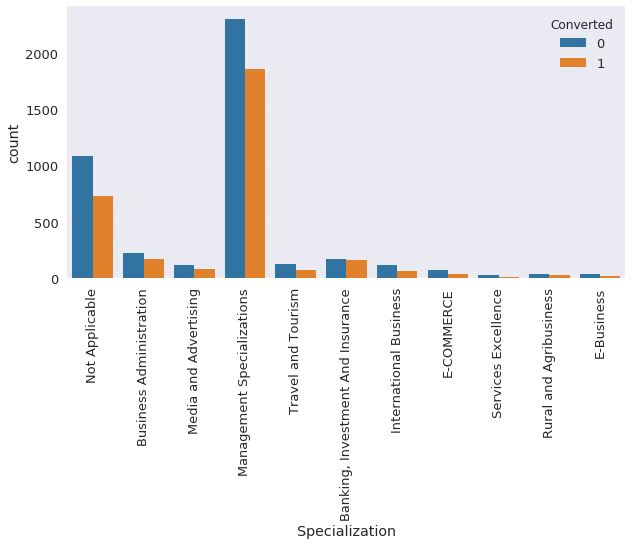

In [46]:
# Plot Specialization modified
plt.figure(figsize=(10,5))
sns.countplot(x = "Specialization", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

In [47]:
#Bucketing 'What is your current occupation'

#Checking the segregation of the column
leads['What is your current occupation'].value_counts()

Unemployed              6666
Working Professional     640
Student                  205
Other                     12
Housewife                  9
Businessman                6
Name: What is your current occupation, dtype: int64

> - Based on the data and the plot seen earlier, we can see there are three categories with not enough frequency
> - We can bucket all of them under 'Other'

In [48]:
#Replacing the values
leads['What is your current occupation'] = leads['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Other')

#Checking the segregation of the column again
leads['What is your current occupation'].value_counts()

Unemployed              6666
Working Professional     640
Student                  205
Other                     27
Name: What is your current occupation, dtype: int64

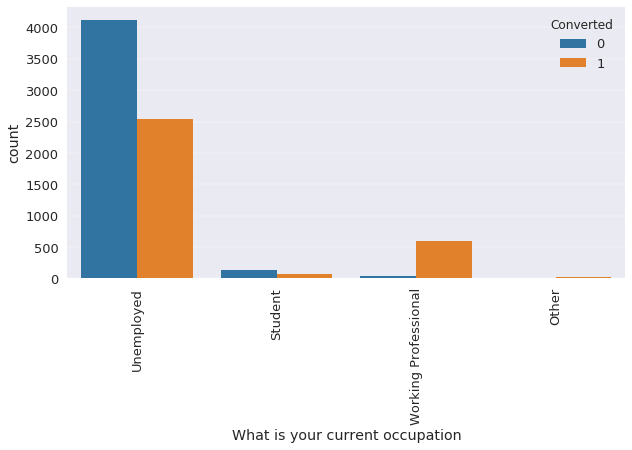

In [49]:
# Plot What is your current occupation modified
plt.figure(figsize=(10,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

In [50]:
#Bucketing 'Tags'

#Checking the segregation of the column
leads['Tags'].value_counts()

Will revert after reading the email                  1983
Not Specified                                        1909
Ringing                                              1168
Interested in other courses                           479
Already a student                                     460
Closed by Horizzon                                    290
switched off                                          238
Busy                                                  185
Lost to EINS                                          163
Not doing further education                           138
Interested  in full time MBA                          116
Graduation in progress                                110
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

> - Based on the data and the plot seen earlier, we can see the few values having only minor frequency
> - So we will categorize all of those with frequency under 100 in the bracket of 'Others'

In [51]:
#Replacing the values
leads['Tags'] = leads['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Still Thinking','In confusion whether part time or DLP','Interested in Next batch','Want to take admission but has financial problems','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'],'Other')

#Checking the segregation of the column again
leads['Tags'].value_counts()

Will revert after reading the email    1983
Not Specified                          1909
Ringing                                1168
Interested in other courses             479
Already a student                       460
Other                                   299
Closed by Horizzon                      290
switched off                            238
Busy                                    185
Lost to EINS                            163
Not doing further education             138
Interested  in full time MBA            116
Graduation in progress                  110
Name: Tags, dtype: int64

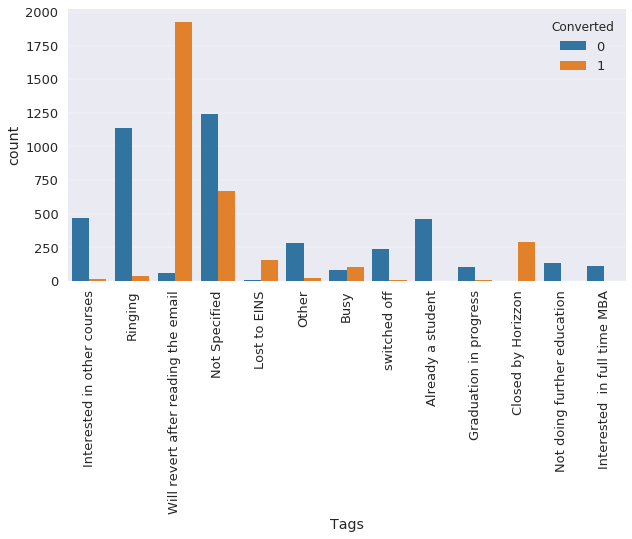

In [52]:
# Plot Tags modified
plt.figure(figsize=(10,5))
sns.countplot(x = "Tags", hue = "Converted", data = leads)
plt.xticks(rotation = 90)
plt.show()

In [53]:
#Bucketing 'City'

#Checking the segregation of the column
leads['City'].value_counts()

Mumbai                         5260
Thane & Outskirts               726
Other Cities                    665
Other Cities of Maharashtra     443
Other Metro Cities              371
Tier II Cities                   73
Name: City, dtype: int64

> - We can see that there are multiple categories with 'Other Cities'
> - However, it seems that the company is categorizing cities based on proximity to Mumbai
> - We can compare if there is any distinct impact of these values on the target variable

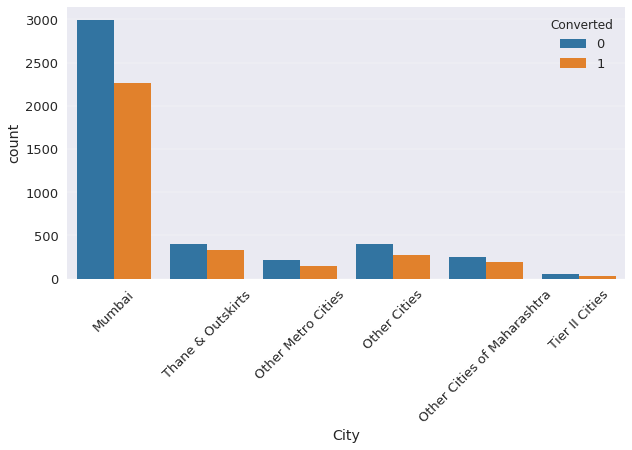

In [54]:
# Plotting graph for City
plt.figure(figsize=(10,5))
sns.countplot(x = "City", hue = "Converted", data = leads)
plt.xticks(rotation = 45)
plt.show()

> - We can club Thane & Outskirts & Other Cities of Maharashtra as 'Other Cities of Maharashtra'
> - Similarly, we can club Other Cities & Other Metro Cities 'Other Cities'


In [55]:
#Replacing the values
leads.City = leads.City.replace({'Other Metro Cities':'Other Cities','Thane & Outskirts':'Other Cities of Maharashtra'})

#Checking the segmentation again
leads.City.value_counts()

Mumbai                         5260
Other Cities of Maharashtra    1169
Other Cities                   1036
Tier II Cities                   73
Name: City, dtype: int64

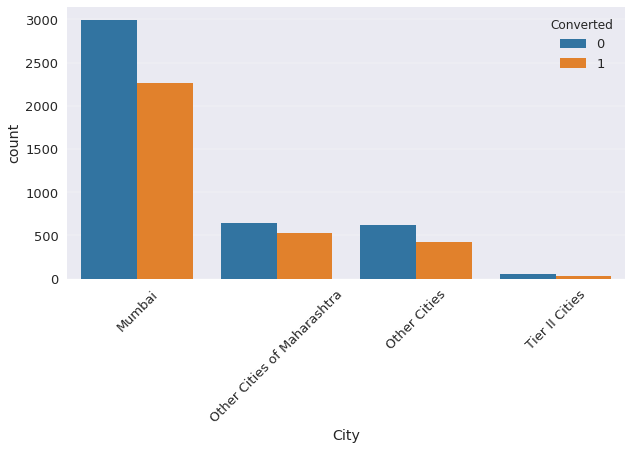

In [56]:
# Plotting graph for City
plt.figure(figsize=(10,5))
sns.countplot(x = "City", hue = "Converted", data = leads)
plt.xticks(rotation = 45)
plt.show()

In [57]:
# Bucketing 'Last Notable Activity'
leads['Last Notable Activity'].value_counts()

Modified                        2476
Email Opened                    2452
SMS Sent                        2012
Page Visited on Website          244
Email Link Clicked               128
Olark Chat Conversation           87
Email Bounced                     55
Unsubscribed                      38
Unreachable                       28
Had a Phone Conversation          12
Email Marked Spam                  2
Email Received                     1
Approached upfront                 1
View in browser link Clicked       1
Form Submitted on Website          1
Name: Last Notable Activity, dtype: int64

> - Based on the data and the plot seen earlier, we can see the few values having only minor frequency
> - So we will categorize all of those with frequency under 100 in the bracket of 'Others'

In [58]:
#Replacing the values
leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Olark Chat Conversation','Email Bounced','Unsubscribed','Unreachable','Had a Phone Conversation','Email Marked Spam','Approached upfront','View in browser link Clicked','Form Submitted on Website','Email Received'],'Other')

#Checking the segregation of the column again
leads['Last Notable Activity'].value_counts()

Modified                   2476
Email Opened               2452
SMS Sent                   2012
Page Visited on Website     244
Other                       226
Email Link Clicked          128
Name: Last Notable Activity, dtype: int64

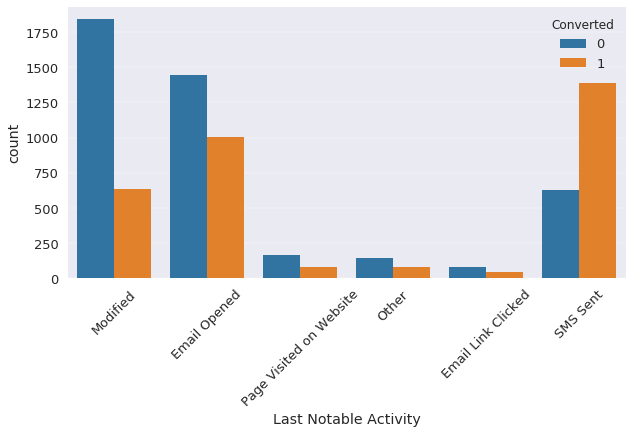

In [59]:
# Plotting graph for Last Notable Activity
plt.figure(figsize=(10,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads)
plt.xticks(rotation = 45)
plt.show()

## **Step 4:** Data preparation

#### **Step 4.1:** Encoding columns

*  Now, we have the final columns and the values in each after the data cleaning
*  The next step is to prepare the data for logistic regression
*  The first step is to change binary columns to numerical values and dummy encoded the non-binary categorical columns

In [60]:
# Creating a list of all binary columns
leads_bin_columns = ['Do Not Email','Do Not Call','Search','A free copy of Mastering The Interview']

#Replacing the values with 1 and 0
for col in leads_bin_columns:
    leads[col] = leads[col].replace('Yes',1)
    leads[col] = leads[col].replace('No',0)

In [61]:
# Creating dummy variables for the variable 'Lead Origin'
dummy = pd.get_dummies(leads['Lead Origin'], prefix='Origin', drop_first = True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy], axis=1)

In [62]:
# Creating dummy variables for the variable 'Lead Source'
dummy = pd.get_dummies(leads['Lead Source'], prefix='Source', drop_first = True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy], axis=1)

In [63]:
# Creating dummy variables for the variable 'Last Activity'
dummy = pd.get_dummies(leads['Last Activity'], prefix='Last_Activity', drop_first = True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy], axis=1)

In [64]:
# Creating dummy variables for the variable 'Specialization'
dummy = pd.get_dummies(leads['Specialization'], prefix='Specialization', drop_first = True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy], axis=1)

In [65]:
# Creating dummy variables for the variable 'What is your current occupation'
dummy = pd.get_dummies(leads['What is your current occupation'], prefix='Occupation', drop_first = True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy], axis=1)

In [66]:
# Creating dummy variables for the variable 'Tags'
dummy = pd.get_dummies(leads['Tags'], prefix='Tags', drop_first = True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy], axis=1)

In [67]:
# Creating dummy variables for the variable 'City'
dummy = pd.get_dummies(leads['City'], prefix='City', drop_first = True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy], axis=1)

In [68]:
# Creating dummy variables for the variable 'Last Notable Activity'
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix='Last_Notable_Activity', drop_first = True)
#Adding the results to the master dataframe
leads = pd.concat([leads,dummy], axis=1)

In [69]:
#Dropping all the duplicate columns:
cols_to_drop = ['Lead Origin','Lead Source','Last Activity','Specialization','What is your current occupation','Tags','City','Last Notable Activity']
leads = leads.drop(cols_to_drop, 1)

#### **Step 4.2:** Reducing correlation

*  Now that we have encoded all columns to numerical values, we will be identifying the correlation between these columns
*  We will be deleting these columns to reduce correlation

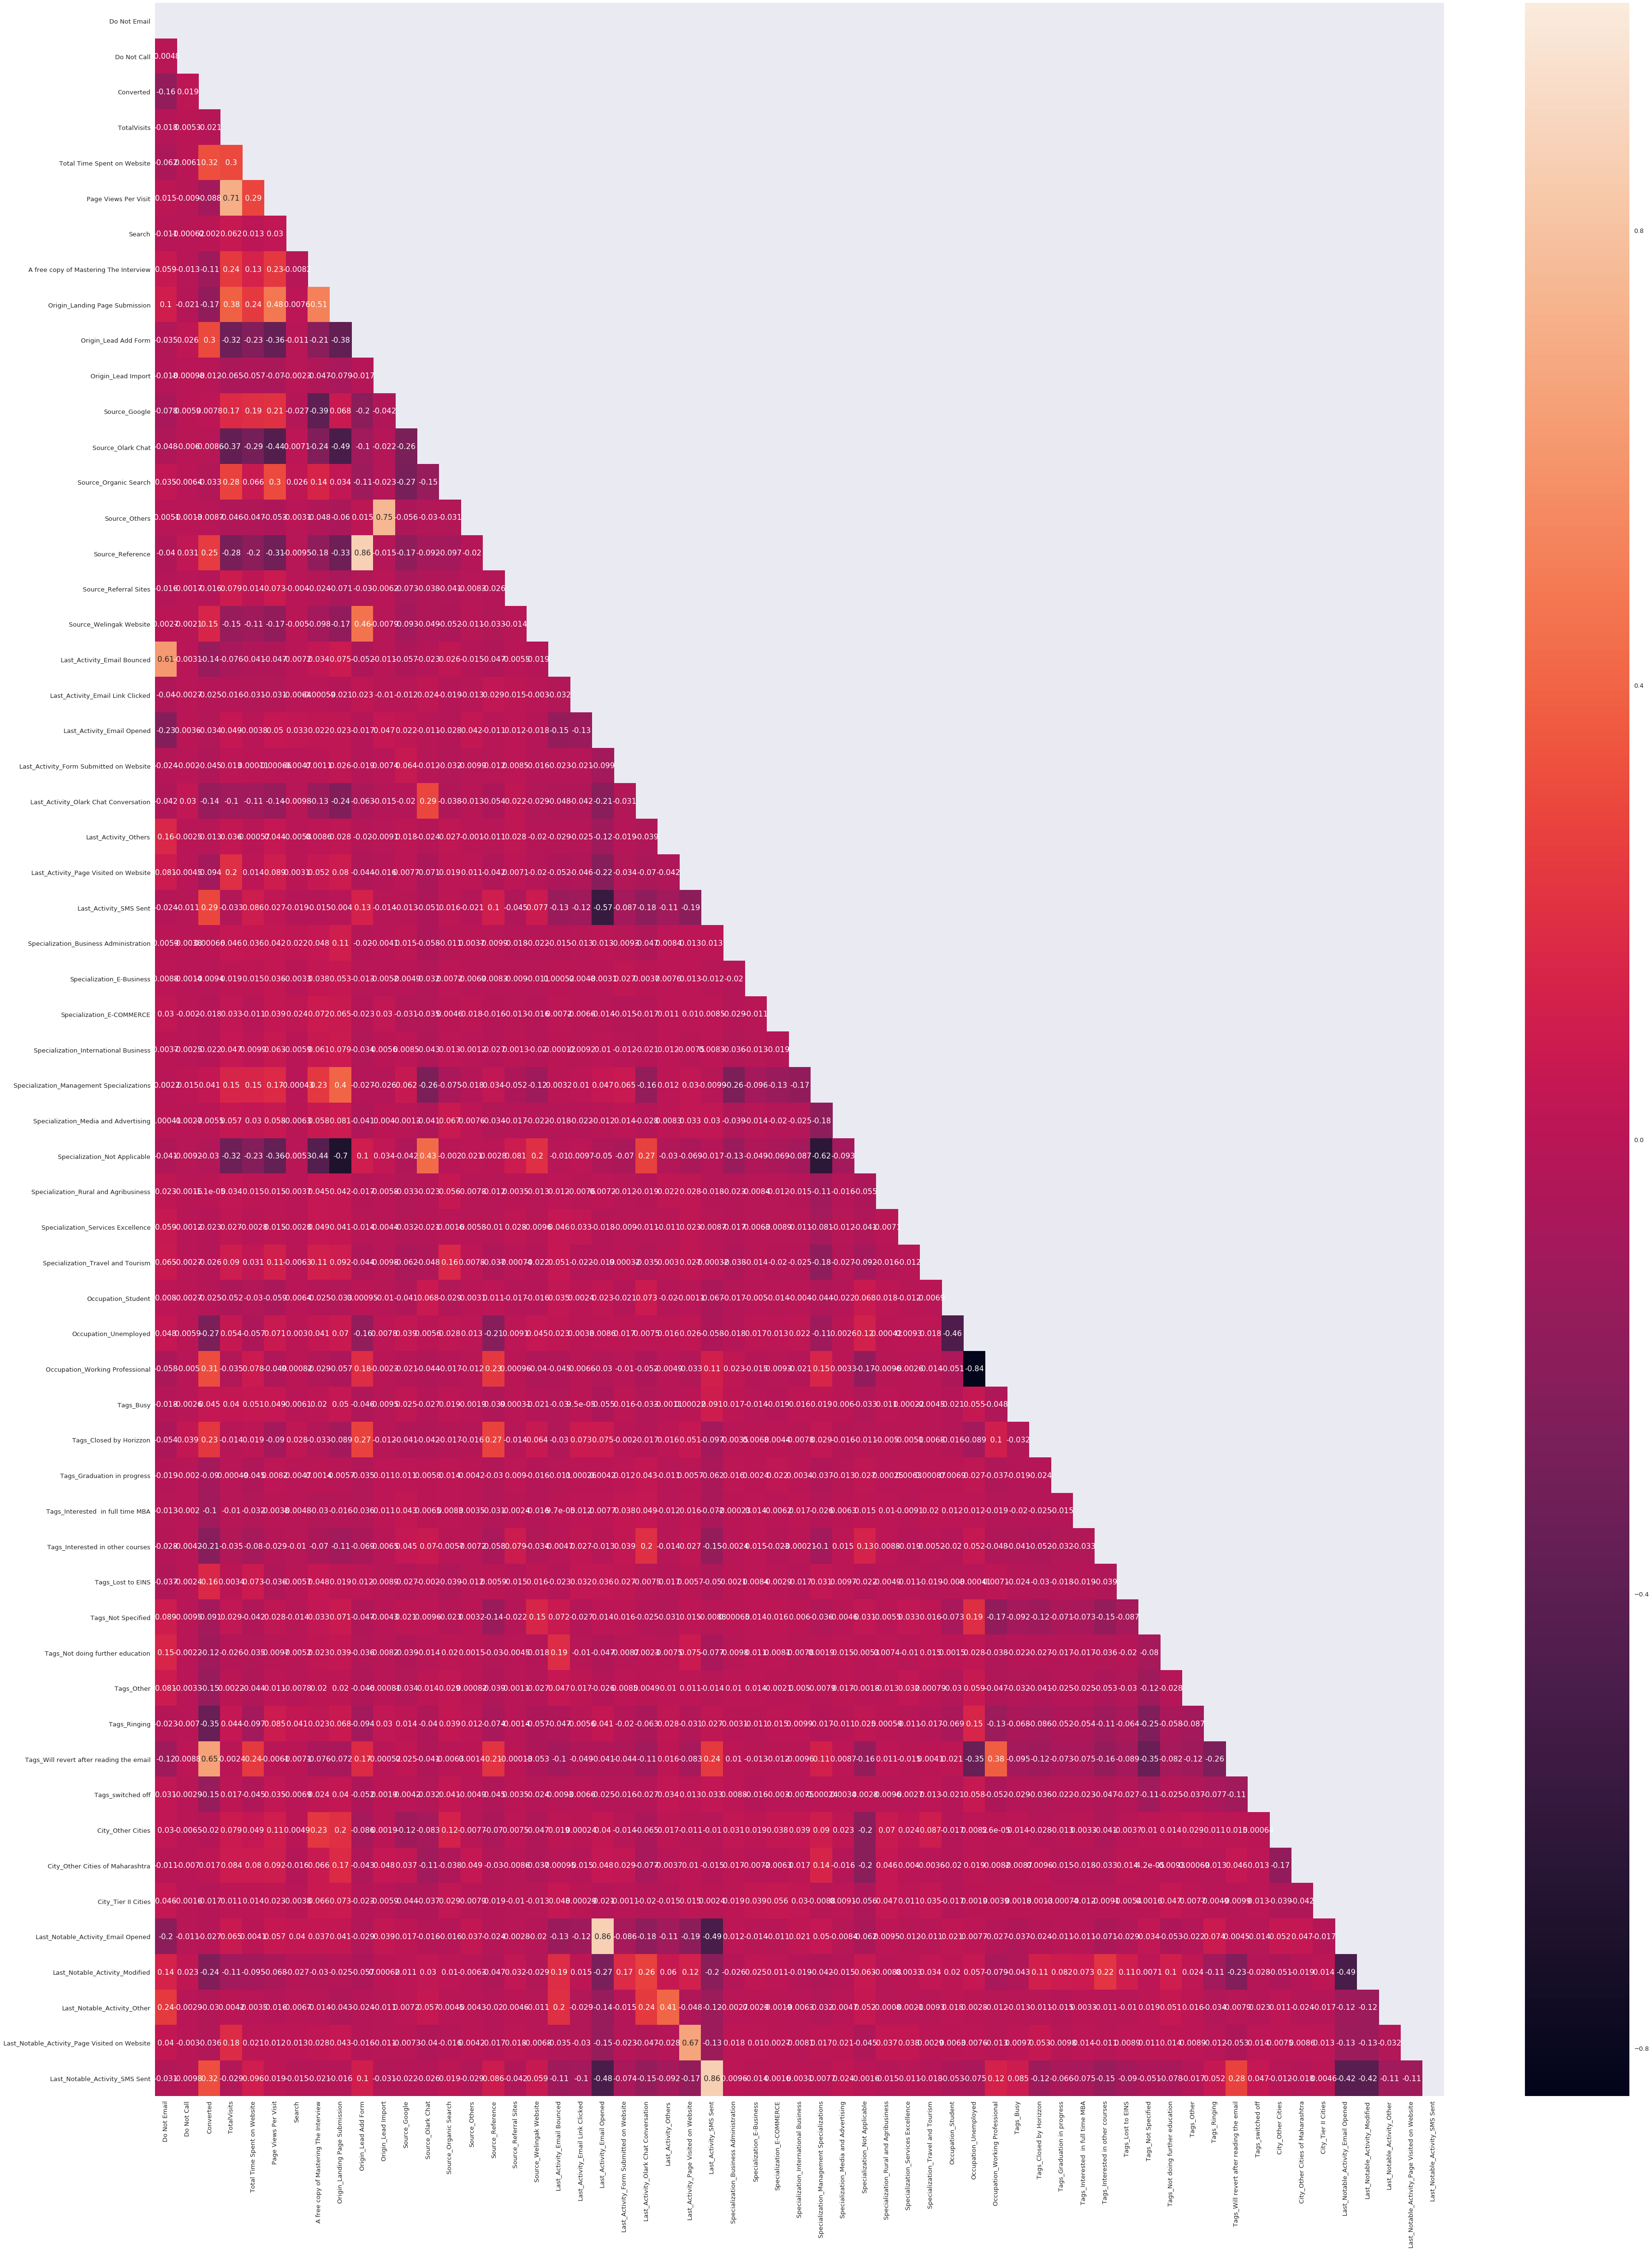

In [70]:
# Let's see the correlation matrix 
plt.figure(figsize = (60,80))
mask = np.triu(np.ones_like(leads.corr()))
sns.heatmap(leads.corr(),annot = True, mask = mask)
plt.show()

__Note:__ We understand the value in heatmap are difficult to read but this is an important step to remove irrelevant columns from the data. We have tried zooming in and came with the list of columns which can be removed.

In [71]:
#Dropping columns with correlation based on the grid above
leads = leads.drop(['Last_Activity_Email Bounced', 'Page Views Per Visit', 'Origin_Landing Page Submission', 'Origin_Lead Add Form', 'Source_Others', 'Last_Activity_Email Opened', 'Last_Activity_Page Visited on Website', 'Last_Notable_Activity_SMS Sent', 'Specialization_Management Specializations', 'Occupation_Working Professional'],1)


#### **Step 4.3:** Test - Train Split

*  After checking the correlation of the data and removing some highly correlated columns, we will now split the data into two segments - test and train
*  We will fit our model on train data and evaluate on the test data afterwards

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Search,A free copy of Mastering The Interview,Origin_Lead Import,Source_Google,Source_Olark Chat,Source_Organic Search,Source_Reference,Source_Referral Sites,Source_Welingak Website,Last_Activity_Email Link Clicked,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Others,Last_Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Media and Advertising,Specialization_Not Applicable,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Occupation_Student,Occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not Specified,Tags_Not doing further education,Tags_Other,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Tier II Cities,Last_Notable_Activity_Email Opened,Last_Notable_Activity_Modified,Last_Notable_Activity_Other,Last_Notable_Activity_Page Visited on Website
0,0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,2.0,1532,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
3,0,0,1.0,305,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,2.0,1428,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


In [74]:
# Putting response variable to y
y = leads['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [75]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### **Step 4.4:** Feature Scaling

*  Now that we have split the data into test and train sections, we will scale the features in the segments

In [76]:
from sklearn.preprocessing import StandardScaler

In [77]:
# Scale all the columns except dummy and binary variables using min max scaling

scaler = StandardScaler()

num_vars = ['TotalVisits', 'Total Time Spent on Website']

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [78]:
# Transforming the test data with the same scaler
X_test[num_vars] = scaler.transform(X_test[num_vars])

## **Step 5:** Model Building

#### **Step 5.1:** Building the first model

*  We have prepared the data for the logistic model now and the next step is to build the model
*  The first step is to create a quick model with the current setup

In [79]:
import statsmodels.api as sm

In [80]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5276
Model:                            GLM   Df Residuals:                     5227
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -929.47
Date:                Mon, 20 Mar 2023   Deviance:                       1858.9
Time:                        13:47:28   Pearson chi2:                 1.03e+04
No. Iterations:                    19   Covariance Type:             nonrobust
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.2364      0.921     -4.600      0.000      -6.042      -2.431
Do Not Email                                     -0.9580      0.319     -3.002      0.003      -1.583      -0.333
Do Not Call                                      17.3257   1.23e+04      0.001      0.999   -2.41e+04    2.41e+04
TotalVisits                                       0.2080      0.075      2.755      0.006       0.060       0.356
Total Time Spent on Website                       1.0621      0.070     15.248      0.000       0.926       1.199
Search                                            1.6953      1.513      1.120      0.263      -1.271       4.662
A free copy of Mastering The Interview           -0.1358      0.183     -0.742      0.458      -0.495       0.223
Origin_Lead Import                                1.1281      0.864      1.305      0.192      -0.566       2.822
Source_Google                                     0.1596      0.193      0.828      0.408      -0.218       0.537
Source_Olark Chat                                 1.5679      0.254      6.164      0.000       1.069       2.066
Source_Organic Search                            -0.2444      0.228     -1.070      0.284      -0.692       0.203
Source_Reference                                  1.6969      0.468      3.628      0.000       0.780       2.614
Source_Referral Sites                             0.5107      0.557      0.917      0.359      -0.581       1.602
Source_Welingak Website                           4.4728      0.773      5.788      0.000       2.958       5.987
Last_Activity_Email Link Clicked                 -0.2615      0.450     -0.581      0.561      -1.143       0.620
Last_Activity_Form Submitted on Website           0.2233      0.603      0.370      0.711      -0.958       1.405
Last_Activity_Olark Chat Conversation            -0.8159      0.390     -2.090      0.037      -1.581      -0.051
Last_Activity_Others                             -0.0422      0.597     -0.071      0.944      -1.212       1.128
Last_Activity_SMS Sent                            1.2216      0.293      4.165      0.000       0.647       1.797
Specialization_Business Administration            0.4938      0.277      1.782      0.075      -0.049       1.037
Specialization_E-Business                        -0.3270      0.607     -0.538      0.590      -1.518       0.864
Specialization_E-COMMERCE                         0.6709      0.520      1.291      0.197      -0.347       1.689
Specialization_International Business            -0.0604      0.407     -0.148      0.882      -0.859       0.738
Specialization_Media and Advertising             -0.1883      0.400     -0.471      0.638      -0.972       0.596
Specialization_Not Applicable                     1.5010      0.201      7.484      

> - As we can see in the statistics of the first model, the p value is high for some features
> - The inference from this is that these features might be insignificant to the model
> - In order to fix this, we will use RFE to limit the features and then confirm again if more features can be removed through manual process

#### **Step 5.2:** Feature selection using RFE

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [83]:
rfe.support_

array([ True, False, False,  True, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False,  True,  True,
       False, False,  True,  True,  True, False, False, False, False,
        True, False, False])

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 22),
 ('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Search', False, 8),
 ('A free copy of Mastering The Interview', False, 18),
 ('Origin_Lead Import', False, 12),
 ('Source_Google', False, 34),
 ('Source_Olark Chat', True, 1),
 ('Source_Organic Search', False, 24),
 ('Source_Reference', True, 1),
 ('Source_Referral Sites', False, 14),
 ('Source_Welingak Website', True, 1),
 ('Last_Activity_Email Link Clicked', False, 21),
 ('Last_Activity_Form Submitted on Website', False, 30),
 ('Last_Activity_Olark Chat Conversation', False, 4),
 ('Last_Activity_Others', False, 33),
 ('Last_Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 16),
 ('Specialization_E-Business', False, 26),
 ('Specialization_E-COMMERCE', False, 17),
 ('Specialization_International Business', False, 29),
 ('Specialization_Media and Advertising', False, 27),
 ('Specialization_Not Applicable', True, 1),
 ('Special

In [85]:
col = X_train.columns[rfe.support_]

In [86]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Search',
       'A free copy of Mastering The Interview', 'Origin_Lead Import',
       'Source_Google', 'Source_Organic Search', 'Source_Referral Sites',
       'Last_Activity_Email Link Clicked',
       'Last_Activity_Form Submitted on Website',
       'Last_Activity_Olark Chat Conversation', 'Last_Activity_Others',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Occupation_Student',
       'Occupation_Unemployed', 'Tags_Graduation in progress',
       'Tags_Interested  in full time MBA', 'Tags_Interested in other courses',
       'Tags_Not doing further education', 'Tags_Other', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Tier II Citi

> Now that we have identified 15 columns with the most significance using RFE, we will build another model

#### **Step 5.3:** Building the second model

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5276
Model:                            GLM   Df Residuals:                     5260
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -958.81
Date:                Mon, 20 Mar 2023   Deviance:                       1917.6
Time:                        13:47:29   Pearson chi2:                 1.05e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.1120      0.226    -18.196      0.000      -4.555      -3.669
Do Not Email                                -0.9828      0.287     -3.430      0.001      -1.544      -0.421
Total Time Spent on Website                  1.0489      0.068     15.516      0.000       0.916       1.181
Source_Olark Chat                            1.1804      0.197      5.989      0.000       0.794       1.567
Source_Reference                             1.5515      0.436      3.562      0.000       0.698       2.405
Source_Welingak Website                      4.1561      0.751      5.537      0.000       2.685       5.627
Last_Activity_SMS Sent                       1.6914      0.135     12.546      0.000       1.427       1.956
Specialization_Not Applicable                1.4172      0.167      8.475      0.000       1.089       1.745
Tags_Busy                                    3.0423      0.306      9.941      0.000       2.443       3.642
Tags_Closed by Horizzon                      9.0629      0.773     11.727      0.000       7.548      10.578
Tags_Lost to EINS                            7.9002      0.579     13.646      0.000       6.765       9.035
Tags_Not Specified                           2.6542      0.216     12.293      0.000       2.231       3.077
Tags_Ringing                                -1.1337      0.314     -3.610      0.000      -1.749      -0.518
Tags_Will revert after reading the email     7.1776      0.282     25.442      0.000       6.625       7.730
Tags_switched off                           -0.8864      0.569     -1.558      0.119      -2.002       0.229
Last_Notable_Activity_Modified              -1.7139      0.151    -11.383      0.000      -2.009      -1.419
============================================================================================================
"""

> - We can see that the column 'Tags_switched off' has a high p value
> - This means that this column is not significant in the model and can be removed
> - Let's create a third model without this feature

#### **Step 5.4:** Building the third model

In [88]:
col = col.drop(['Tags_switched off'],1)

In [89]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5276
Model:                            GLM   Df Residuals:                     5261
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -960.24
Date:                Mon, 20 Mar 2023   Deviance:                       1920.5
Time:                        13:47:29   Pearson chi2:                 9.86e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.2554      0.216    -19.712      0.000      -4.679      -3.832
Do Not Email                                -0.9881      0.286     -3.456      0.001      -1.548      -0.428
Total Time Spent on Website                  1.0519      0.068     15.580      0.000       0.920       1.184
Source_Olark Chat                            1.1989      0.197      6.085      0.000       0.813       1.585
Source_Reference                             1.5767      0.437      3.605      0.000       0.719       2.434
Source_Welingak Website                      4.1673      0.750      5.554      0.000       2.697       5.638
Last_Activity_SMS Sent                       1.6634      0.133     12.482      0.000       1.402       1.925
Specialization_Not Applicable                1.4124      0.167      8.462      0.000       1.085       1.740
Tags_Busy                                    3.1987      0.296     10.824      0.000       2.619       3.778
Tags_Closed by Horizzon                      9.1851      0.771     11.912      0.000       7.674      10.696
Tags_Lost to EINS                            8.0304      0.576     13.935      0.000       6.901       9.160
Tags_Not Specified                           2.8020      0.204     13.747      0.000       2.403       3.201
Tags_Ringing                                -0.9733      0.303     -3.214      0.001      -1.567      -0.380
Tags_Will revert after reading the email     7.3152      0.275     26.597      0.000       6.776       7.854
Last_Notable_Activity_Modified              -1.6991      0.150    -11.292      0.000      -1.994      -1.404
============================================================================================================
"""

> - We can see now that all the columns are significant on the basis of p value
> - The next step is to check the VIF score in this model to identify and reduce multicollinearity

In [90]:
    # Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Specialization_Not Applicable,1.71
5,Last_Activity_SMS Sent,1.68
12,Tags_Will revert after reading the email,1.66
2,Source_Olark Chat,1.59
3,Source_Reference,1.46
1,Total Time Spent on Website,1.39
13,Last_Notable_Activity_Modified,1.36
10,Tags_Not Specified,1.33
8,Tags_Closed by Horizzon,1.22
4,Source_Welingak Website,1.18


> - As we can see from the VIF values, none of them exceed 5
> - This means that the multicollinearity in the model is already low and does not need further processing
> - Given this, we have satisfactory model and now we can predict the target variable based on the model before evaluating

#### **Step 5.5:** Predicting the target variable 'Converted'

In [92]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5405    0.114091
1390    0.976761
4600    0.079483
4826    0.870431
5285    0.008978
2548    0.028515
3422    0.389553
6553    0.538016
5307    0.247119
1165    0.983198
dtype: float64

In [93]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11409057, 0.97676071, 0.07948324, 0.8704309 , 0.00897767,
       0.02851531, 0.38955283, 0.53801573, 0.24711898, 0.98319763])

In [94]:
# Creating a dataframe with the actual converted variable and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.114091
1,1,0.976761
2,0,0.079483
3,1,0.870431
4,0,0.008978


#### **Step 5.6:** Checking how good the model is using the ROC curve

In [95]:
from sklearn import metrics

In [96]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(7,7))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [97]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

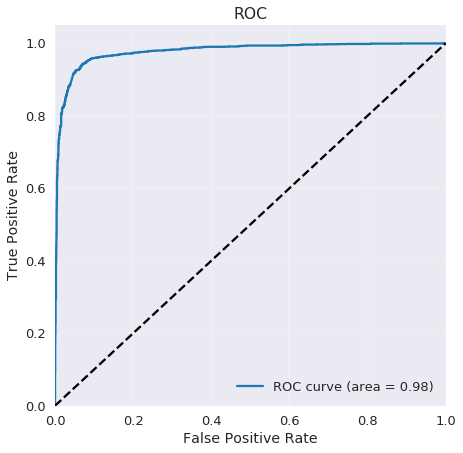

In [98]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

> - For a model, a good ROC curve is where the graph is considered good if the true positive rate is high and false positive rate is low at the elbow
> - As we can see in the model above, the elbow is close to 1 which means the TPR is high whereas the FPR is low
> - Therefore, this model can be considered a good classification model

#### **Step 5.7:** Finding the optimal cutoff

* Now that we have confirmed that our model is good, we need to use statistic metrics and identify the optimal cutoff
* We find this optimal cutoff by balancing sensitivity, specificity and accuracy

In [99]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/20 for x in range(20)]

for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
    
y_train_pred_final.head()

,Converted,Converted_Prob,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.114091,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.976761,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.079483,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.870431,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
4,0,0.008978,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
# Now let's calculate accuracy, sensitivity, and specificity for all the above probability cutoffs

cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

num = [float(x)/20 for x in range(20)]

for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i, accuracy, sensitivity, specificity]
    
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.00         0.00  0.428923     1.000000     0.000000
0.05         0.05  0.798522     0.987185     0.656820
0.10         0.10  0.855951     0.977022     0.765018
0.15         0.15  0.901061     0.966858     0.851643
0.20         0.20  0.919067     0.961555     0.887156
0.25         0.25  0.927028     0.959346     0.902755
0.30         0.30  0.930061     0.954043     0.912048
0.35         0.35  0.932525     0.947415     0.921341
0.40         0.40  0.934799     0.939461     0.931298
0.45         0.45  0.934799     0.927530     0.940259
0.50         0.50  0.936884     0.919576     0.949884
0.55         0.55  0.929113     0.886434     0.961168
0.60         0.60  0.927976     0.877596     0.965815
0.65         0.65  0.923995     0.864339     0.968802
0.70         0.70  0.920015     0.849315     0.973116
0.75         0.75  0.915466     0.835616     0.975440
0.80         0.80  0.912244     0.820592     0.981082
0.85         0.85  0.906368 

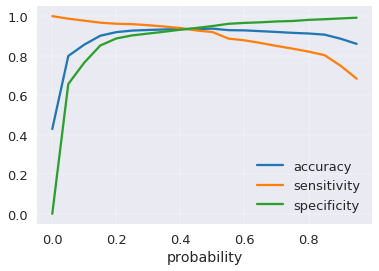

In [102]:
# Let's plot accuracy, sensitivity and specificity for all the above probabilities.

cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

> - As we can see from the graph and the data above, the sensitivity, specificity and accuracy of the model gets balanced at around 0.4 probability
> - The metrics are all numerically close to 93.5% when target is considered converted when probability greater than 0.4
> - We will create a target value based on the same and get the evaluation metrics. Then the same will be tested on the test data

In [103]:
#Retaining only the column with selected cutoff point

y_train_pred_final = y_train_pred_final.drop([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95],1)
y_train_pred_final = y_train_pred_final.rename(columns = {0.4 :'Converted_Pred'})

#Checking the predicted data post updates
y_train_pred_final.head()

,Converted,Converted_Prob,Converted_Pred
0,0,0.114091,0
1,1,0.976761,1
2,0,0.079483,0
3,1,0.870431,1
4,0,0.008978,0


#### **Step 5.8:** Evaluating the metrics on the train data

* We have identified the optimal cutoff and also created our dataframe with the predicted target feature
* Now we will be calculating a few evaluation metrics for the final predicted values in the train data and the same will be tested later on the test dataset

In [104]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [105]:
# Calculating accuracy

accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)

0.9347990902198635

In [106]:
# Calculating precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)

0.9112730390055722

In [107]:
# Calculating recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.Converted_Pred)

0.9394608926204154

> - We have calculated a few metrics on the train data. Now we will predict on the test data and validate if the model isn't overfitted

#### **Step 5.9:** Tranforming the test data

In [108]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Source_Olark Chat,Source_Reference,Source_Welingak Website,Last_Activity_SMS Sent,Specialization_Not Applicable,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Last_Notable_Activity_Modified
8227,0,-0.582997,0,0,0,1,0,0,0,0,0,1,0,0
8160,0,-0.288251,0,0,0,1,0,0,0,0,0,1,0,0
1199,0,1.816817,0,0,0,1,0,0,0,0,0,0,1,0
6453,0,-0.202739,0,0,0,1,0,1,0,0,0,0,0,0
446,0,-0.955978,0,1,0,1,0,0,0,0,0,0,1,1


In [109]:
X_test_sm = sm.add_constant(X_test)

In [110]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

8227    0.015090
8160    0.020462
1199    0.998687
6453    0.597108
446     0.973280
7350    0.006317
6031    0.004366
4567    0.004859
953     0.955594
5533    0.007468
dtype: float64

In [111]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.01508972, 0.02046219, 0.99868716, 0.59710769, 0.9732798 ,
       0.00631743, 0.00436597, 0.00485933, 0.9555938 , 0.00746798])

In [112]:
# Creating a dataframe with the actual converted variable and the predicted probabilities and the predicted target value
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Converted_Prob':y_test_pred})
y_test_pred_final['Converted_Pred']= y_test_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_test_pred_final.head()


,Converted,Converted_Prob,Converted_Pred
0,0,0.015090,0
1,0,0.020462,0
2,1,0.998687,1
3,1,0.597108,1
4,1,0.973280,1


In [113]:
# Calculating accuracy

accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Converted_Pred)

0.9367816091954023

In [114]:
# Calculating precision

precision_score(y_test_pred_final.Converted, y_test_pred_final.Converted_Pred)

0.9187817258883249

In [115]:
# Calculating recall

recall_score(y_test_pred_final.Converted, y_test_pred_final.Converted_Pred)

0.9349173553719008

> - **Final Observations**
> - The values of all evaluation metrics on the test data are almost similar to the training data
> - This proves that the model is not overfitted and is giving an accuracy of ~93.5%
> - We can now use the model to get a lead score for each new lead by calculating it's conversion probability through this model and multiply by 100

In [116]:
#Just showing the coefficients of the model once again
res.params.sort_values(ascending = True)

const                                      -4.255403
Last_Notable_Activity_Modified             -1.699064
Do Not Email                               -0.988060
Tags_Ringing                               -0.973265
Total Time Spent on Website                 1.051871
Source_Olark Chat                           1.198920
Specialization_Not Applicable               1.412395
Source_Reference                            1.576688
Last_Activity_SMS Sent                      1.663369
Tags_Not Specified                          2.802010
Tags_Busy                                   3.198717
Source_Welingak Website                     4.167272
Tags_Will revert after reading the email    7.315227
Tags_Lost to EINS                           8.030392
Tags_Closed by Horizzon                     9.185126
dtype: float64

### **Step 6: Conclusion:**

Using the above-mentioned variables, we can determine whether the leads will be converted to potential buyers for X Education. Focus on potential leads having high converted scores. Make inquiries, appointments and give them detailed information about the product, its functionalities and provide info on job offerings that suits potential leads. Keep in constant touch with the promising leads, arrange meeting with ex-customer/ alumni to give them more insight about the courses, the current requirement in the market and how can the course benefit them.